In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential

In [2]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# CNN model

CNN MODEL


In [ ]:
#get data

In [ ]:
!unzip gdrive/My\ Drive/2022-432-Project-main.zip

In [9]:
#get training, testing, validation data
DIR_train='/content/2022-432-Project-main/Processed Data/train'
CATEGORIES=['mask weared incorrect','with mask', 'without mask']

data_train =[]
labels_train = []

In [10]:
from skimage.exposure import equalize_adapthist
from skimage.transform import resize
        
for category in CATEGORIES:
    path=os.path.join(DIR_train,category)
    for img in os.listdir(path):
        image=os.path.join(path,img)
        image =tf.keras.preprocessing.image.load_img(image,target_size=(96,96))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image=tf.keras.applications.mobilenet_v2.preprocess_input(image)
        data_train.append(image)
        labels_train.append(category)        
    

In [11]:
DIR_test='/content/2022-432-Project-main/Processed Data/test'
CATEGORIES=['mask weared incorrect','with mask', 'without mask']
data_test =[]
labels_test = []
for category in CATEGORIES:
    path=os.path.join(DIR_test,category)
    for img in os.listdir(path):
        image=os.path.join(path,img)
        image =tf.keras.preprocessing.image.load_img(image,target_size=(96,96))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image=tf.keras.applications.mobilenet_v2.preprocess_input(image)
        data_test.append(image)
        labels_test.append(category)       

In [12]:
DIR_val='/content/2022-432-Project-main/Processed Data/val'
CATEGORIES=['mask weared incorrect','with mask', 'without mask']
data_val =[]
labels_val = []
for category in CATEGORIES:
    path=os.path.join(DIR_val,category)
    for img in os.listdir(path):
        image=os.path.join(path,img)
        image =tf.keras.preprocessing.image.load_img(image,target_size=(96,96))
        image = tf.keras.preprocessing.image.img_to_array(image)
        image=tf.keras.applications.mobilenet_v2.preprocess_input(image)
        data_val.append(image)
        labels_val.append(category)       

In [13]:
#encode data
encoder = LabelBinarizer()
labels_train=encoder.fit_transform(labels_train)
labels_test=encoder.fit_transform(labels_test)

In [14]:
X_train=np.array(data_train,dtype='float32')
y_train=np.array(labels_train)

X_test=np.array(data_test,dtype='float32')
y_test=np.array(labels_test)

In [15]:
labels_val=encoder.fit_transform(labels_val)
X_val=np.array(data_val,dtype='float32')
y_val=np.array(labels_val)


In [16]:
#define model
model=Sequential()
model.add(Conv2D(100,(3,3),input_shape=X_train.shape[1:],activation='relu',strides=2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 50)                3

In [18]:
opt = tf.keras.optimizers.Adam(lr=1e-4, decay=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(X_train,y_train,epochs=30,batch_size=5,validation_data=[X_val,y_val])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
652/652 [==============================] - 15s 5ms/step - loss: 0.3193 - accuracy: 0.8916 - val_loss: 0.2160 - val_accuracy: 0.9335
Epoch 2/30
652/652 [==============================] - 3s 4ms/step - loss: 0.2086 - accuracy: 0.9321 - val_loss: 0.1511 - val_accuracy: 0.9581
Epoch 3/30
652/652 [==============================] - 3s 4ms/step - loss: 0.1915 - accuracy: 0.9392 - val_loss: 0.1472 - val_accuracy: 0.9532
Epoch 4/30
652/652 [==============================] - 3s 4ms/step - loss: 0.1763 - accuracy: 0.9447 - val_loss: 0.1364 - val_accuracy: 0.9581
Epoch 5/30
652/652 [==============================] - 3s 4ms/step - loss: 0.1681 - accuracy: 0.9506 - val_loss: 0.1251 - val_accuracy: 0.9557
Epoch 6/30
652/652 [==============================] - 3s 4ms/step - loss: 0.1497 - accuracy: 0.9521 - val_loss: 0.1380 - val_accuracy: 0.9532
Epoch 7/30
652/652 [==============================] - 3s 4ms/step - loss: 0.1441 - accuracy: 0.9567 - val_loss: 0.1295 - val_accuracy: 0.9507
Epoch

In [19]:
model.evaluate(X_test, y_test, batch_size=16)

26/26 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.9415


[0.39253920316696167, 0.9414634108543396]

In [20]:
model.predict(X_test, batch_size=16)

array([[1.1592089e-01, 6.0639423e-01, 2.7768490e-01],
       [9.9628711e-01, 1.7733961e-04, 3.5356153e-03],
       [7.4337912e-01, 2.5662088e-01, 3.0001683e-08],
       ...,
       [7.3893294e-03, 4.3237335e-03, 9.8828691e-01],
       [9.1751193e-05, 2.9726269e-05, 9.9987853e-01],
       [1.5068651e-03, 1.2709843e-02, 9.8578334e-01]], dtype=float32)

In [21]:
pred_test = model.predict(X_test, batch_size=16)>0.5


In [22]:
pred_test

array([[False,  True, False],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [23]:
# show a nicely formatted classification report
print(classification_report(y_test, pred_test,target_names=['incorrecly wear mask','corrrectly wear mask', 'no mask']))

# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("mask_cnn_multi.hdf5", save_format="hdf5")

                      precision    recall  f1-score   support

incorrecly wear mask       0.71      0.38      0.50        13
corrrectly wear mask       0.95      0.98      0.96       324
             no mask       0.93      0.89      0.91        73

           micro avg       0.95      0.94      0.94       410
           macro avg       0.87      0.75      0.79       410
        weighted avg       0.94      0.94      0.94       410
         samples avg       0.94      0.94      0.94       410

[INFO] saving mask detector model...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


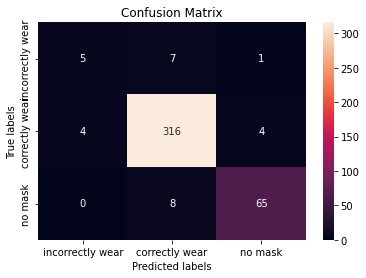

In [25]:
import seaborn as sns
import sklearn

T5_lables = ['incorrectly wear','correctly wear','no mask']    

ax= plt.subplot()

cm = sklearn.metrics.confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(pred_test).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);

In [30]:
np.where(np.not_equal(y_test, pred_test))[0]

array([  0,   0,   3,   3,   4,   4,   7,   7,   9,   9,  10,  10,  11,
        11,  12,  12,  71,  71, 140, 140, 167, 167, 175, 194, 194, 195,
       195, 246, 246, 268, 338, 338, 349, 349, 372, 372, 376, 376, 387,
       387, 398, 398, 401, 401, 406, 406])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


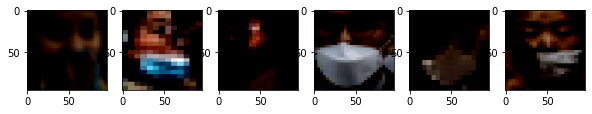

In [33]:
#show some misclassified images
w = 10
h = 5
fig = plt.figure(figsize=(10, 13))
columns = 6
rows = 1
# prep (x,y) for extra plotting
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine
ax = []
index=1
for i in [0,3,4,7,9,10]:
    img = np.random.randint(10, size=(h,w))
    ax.append( fig.add_subplot(rows, columns, index) )
    index+=1
    plt.imshow(X_test[i].reshape(96,96,3))



plt.show()  